In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
rawData=pd.DataFrame()
for i in range(5):
    file_name='data_2015_'
    partData=pd.read_csv(file_name+str(i+1)+'.txt')
    rawData=pd.concat([rawData,partData],axis=0)

In [63]:
rawData.head()

,id,type,time
0,56498c50-84e4,flavor15,2015-01-01
1,56498c51-8cb9,flavor15,2015-01-01
2,56498c52-a50e,flavor8,2015-01-01
3,56498c53-a241,flavor2,2015-01-02
4,56498c54-8528,flavor8,2015-01-02


In [205]:
rawData.shape

(1461, 3)

In [206]:
flavor={}

In [207]:
for flavor_num in range(1,16):
    flavor[flavor_num]=rawData[rawData['type']==('flavor'+str(flavor_num))]

In [208]:
flavor[1]

,id,type,time
77,56498d5f-97dd,flavor1,2015-02-10
78,56498d60-a494,flavor1,2015-02-10
130,56498d94-8b37,flavor1,2015-02-15
266,56498e1c-8567,flavor1,2015-02-27
267,56498e1d-9a5f,flavor1,2015-02-27
61,56498e68-8201,flavor1,2015-03-02
87,56498e82-853b,flavor1,2015-03-18
123,56498ea6-b403,flavor1,2015-03-24
192,564bfd1f-89c7,flavor1,2015-03-30
202,564bfd29-b352,flavor1,2015-03-31


In [209]:
def get_month_date(day_num):
    month_num=0
    date_num=0
    if day_num<=31:
        month_num=1
        date_num=day_num
    elif day_num>31 and day_num<=60:
        month_num=2
        date_num=day_num-31
    elif day_num>60 and day_num<=91:
        month_num=3
        date_num=day_num-60
    elif day_num>91 and day_num<=121:
        month_num=4
        date_num=day_num-91
    else:
        month_num=5
        date_num=day_num-121
    return month_num,date_num

In [210]:
def get_date_stamp(day_num):
    date_stamp='2015-0'
    month_num,date_num=get_month_date(day_num)
    if date_num<10:
        date_key=date_stamp+str(month_num)+'-0'+str(date_num)
    else:
        date_key=date_stamp+str(month_num)+'-'+str(date_num)
    return date_key

In [211]:
print(get_month_date(100))

(4, 9)


In [212]:
def get_flavor_info(flavor_info):
    date_list=[]
    count_list=[]
    count=0
    for i in range(1,153):
        date_stamp=get_date_stamp(i)
        #print(date_stamp)
        day_use=flavor_info[flavor_info['time']==date_stamp]
        #print(day_use)
        count+=day_use.shape[0]
        date_list.append(i)
        count_list.append(count)
    flavor_dict={
        'date':date_list,
        'usage':count_list
    }
    flavor=pd.DataFrame(flavor_dict)
    return flavor

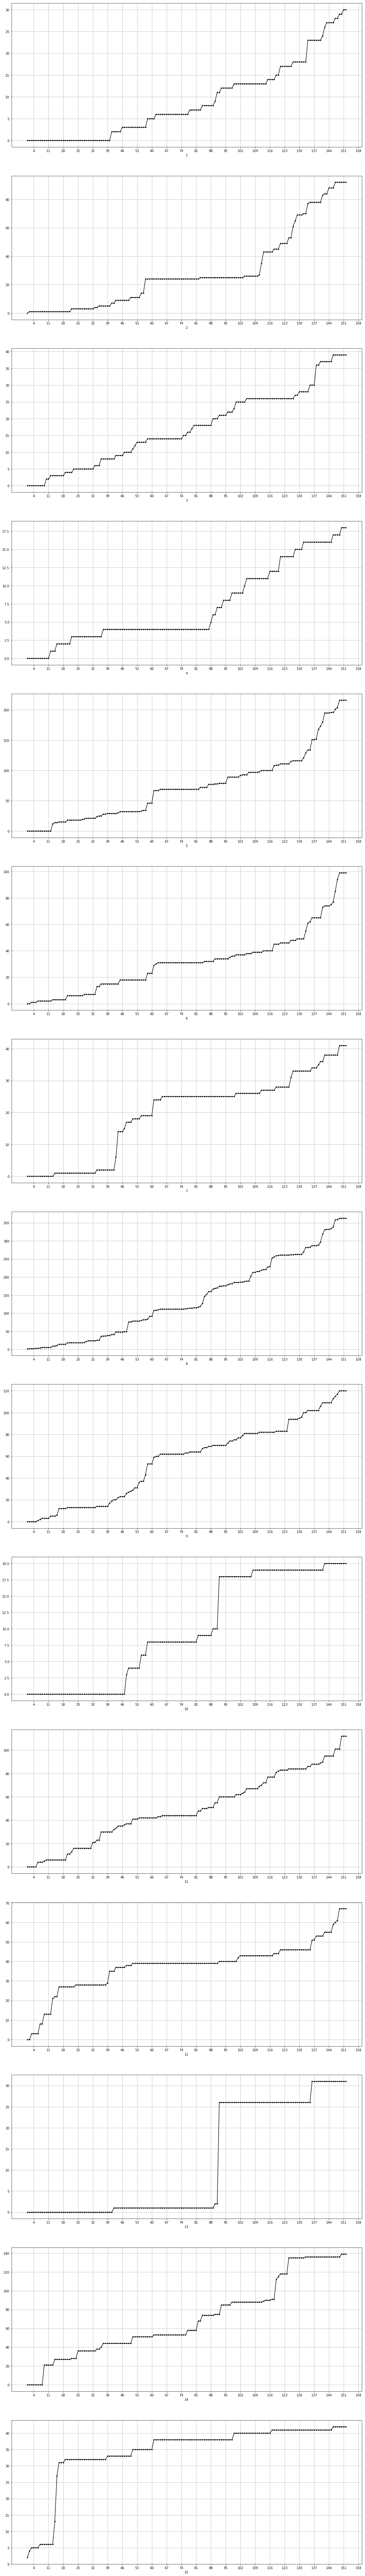

In [215]:
major_ticks = np.arange(4, 160, 7)
fig=plt.figure(1,figsize=(20,150))
for i in range(1,16):
    flavor_each=get_flavor_info(flavor[i])
    ax=fig.add_subplot(15,1,i)
    ax.set_xticks(major_ticks)
    plt.plot(flavor_each['date'],flavor_each['usage'],color="black",marker='.')
    plt.xlabel(i)
    plt.grid(True,)